In [100]:
import pandas as pd

def extract_data():
    df = pd.read_excel("Datensatz Piet.xlsx", sheet_name=0)

    df = df.iloc[7:, 3:-3]
    df.columns = df.iloc[0]
    cols = df.columns.tolist()
    cols[0] = "group"
    cols[1] = "features"
    df.columns = cols
    
    df.reset_index(drop=True, inplace=True)
    df = df.drop(0) 
    return df


df = extract_data()


In [101]:
df_anfang_a = df[df['group'] == 'Anfang A']
df_ende_a = df[df['group'] == 'Ende A']
df_anfang_b = df[df['group'] == 'Anfang B']
df_ende_b = df[df['group'] == 'Ende B']



In [102]:
df_anfang_a.shape, df_ende_a.shape, df_anfang_b.shape, df_ende_b.shape

((15, 22), (15, 22), (15, 22), (15, 22))

In [103]:
dfs = [df_anfang_a, df_ende_a, df_anfang_b, df_ende_b]

In [104]:
def transpose(df):
    df = df.set_index("features").T
    df['group'] = df.loc['group'].values[0]
    print(df.loc['group'].values[0])
    df.reset_index(inplace=True)
    df = df.drop(index=0).reset_index(drop=True)
    return df

In [105]:
def preprocess_data(dfs):
    dfs_T = []
    for df in dfs:
        dfs_T.append(transpose(df))
    df_all = pd.concat(dfs_T, ignore_index=True)
    df_all = df_all.set_index(["group", "index"])
    return df_all


In [106]:
df_all = preprocess_data(dfs)

Anfang A
Ende A
Anfang B
Ende B


# Vergleiche deutsche mit spanische Schüler*innen

In [107]:
dfs_spanisch = []
dfs_deutsch = []
for a, b in df_all.groupby('group'):
    b_spanisch = b.iloc[:15]
    b_deutsch = b.iloc[15:]
    dfs_spanisch.append(b_spanisch)
    dfs_deutsch.append(b_deutsch)

df_spanisch = pd.concat(dfs_spanisch)
df_deutsch = pd.concat(dfs_deutsch)


In [108]:
import scipy.stats as stats

groups = df_all.index.get_level_values(0).unique().to_list()
spalten = df_all.columns.tolist()

rows = []
for g in groups:
    for col in spalten:
        deutsche = df_deutsch.xs(g, level=0)[col].to_list()
        spanier = df_spanisch.xs(g, level=0)[col].to_list()
        u_stat, p_val = stats.mannwhitneyu(
            deutsche, spanier,
            alternative="two-sided",
            method="exact"   
        )
        rows.append({"Gruppe": g, "Spalte": col, "p-Wert": p_val})

results

results_df = pd.DataFrame(rows)
results_df[results_df["p-Wert"] < 0.05]

,Gruppe,Spalte,p-Wert
8,Anfang A,Präposition,0.01935


In [109]:
results_df[results_df['Gruppe'] == 'Anfang A']

,Gruppe,Spalte,p-Wert
0,Anfang A,Fachbegriffe,0.865970
1,Anfang A,falsch verwendete Fachbegriffe,0.865970
2,Anfang A,Körperteile,0.932792
3,Anfang A,falsch verwendete Körperteile,0.865970
4,Anfang A,Verben,0.394866
5,Anfang A,falsch verwendete Verben,1.000000
6,Anfang A,Adjektive,0.932792
7,Anfang A,falsch verwendete Adjektive,1.000000
8,Anfang A,Präposition,0.019350
9,Anfang A,falsch verwendete Präposition,0.497291


In [110]:
results_df[results_df['Gruppe'] == 'Ende A']

,Gruppe,Spalte,p-Wert
15,Ende A,Fachbegriffe,0.735423
16,Ende A,falsch verwendete Fachbegriffe,0.865970
17,Ende A,Körperteile,0.800052
18,Ende A,falsch verwendete Körperteile,0.735423
19,Ende A,Verben,0.553148
20,Ende A,falsch verwendete Verben,0.865970
21,Ende A,Adjektive,0.167957
22,Ende A,falsch verwendete Adjektive,1.000000
23,Ende A,Präposition,0.672472
24,Ende A,falsch verwendete Präposition,0.735423


In [111]:
results_df[results_df['Gruppe'] == 'Anfang B']

,Gruppe,Spalte,p-Wert
30,Anfang B,Fachbegriffe,0.865970
31,Anfang B,falsch verwendete Fachbegriffe,0.735423
32,Anfang B,Körperteile,0.735423
33,Anfang B,falsch verwendete Körperteile,1.000000
34,Anfang B,Verben,0.672472
35,Anfang B,falsch verwendete Verben,0.672472
36,Anfang B,Adjektive,1.000000
37,Anfang B,falsch verwendete Adjektive,0.865970
38,Anfang B,Präposition,0.735423
39,Anfang B,falsch verwendete Präposition,0.932792


In [112]:
results_df[results_df['Gruppe'] == 'Ende B']

,Gruppe,Spalte,p-Wert
45,Ende B,Fachbegriffe,0.553148
46,Ende B,falsch verwendete Fachbegriffe,0.735423
47,Ende B,Körperteile,0.932792
48,Ende B,falsch verwendete Körperteile,0.672472
49,Ende B,Verben,0.865970
50,Ende B,falsch verwendete Verben,0.141770
51,Ende B,Adjektive,0.065531
52,Ende B,falsch verwendete Adjektive,0.553148
53,Ende B,Präposition,0.735423
54,Ende B,falsch verwendete Präposition,0.141770


# Vergleich Anfang A und Ende A aller Schüler

In [113]:
def compare_by_group(df_all, group1, group2):
    anfang = df_all.xs(group1, level=0)
    ende = df_all.xs(group2, level=0)

    return (ende - anfang), anfang, ende

diff_A = compare_by_group(df_all, "Anfang A", "Ende A")

In [114]:
anfang_B = df_all.xs("Anfang B", level=0)
ende_B = df_all.xs("Ende B", level=0)

diff_B = ende_B - anfang_B

/home/dci-student/Auswertung_masterarbeit_marla/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


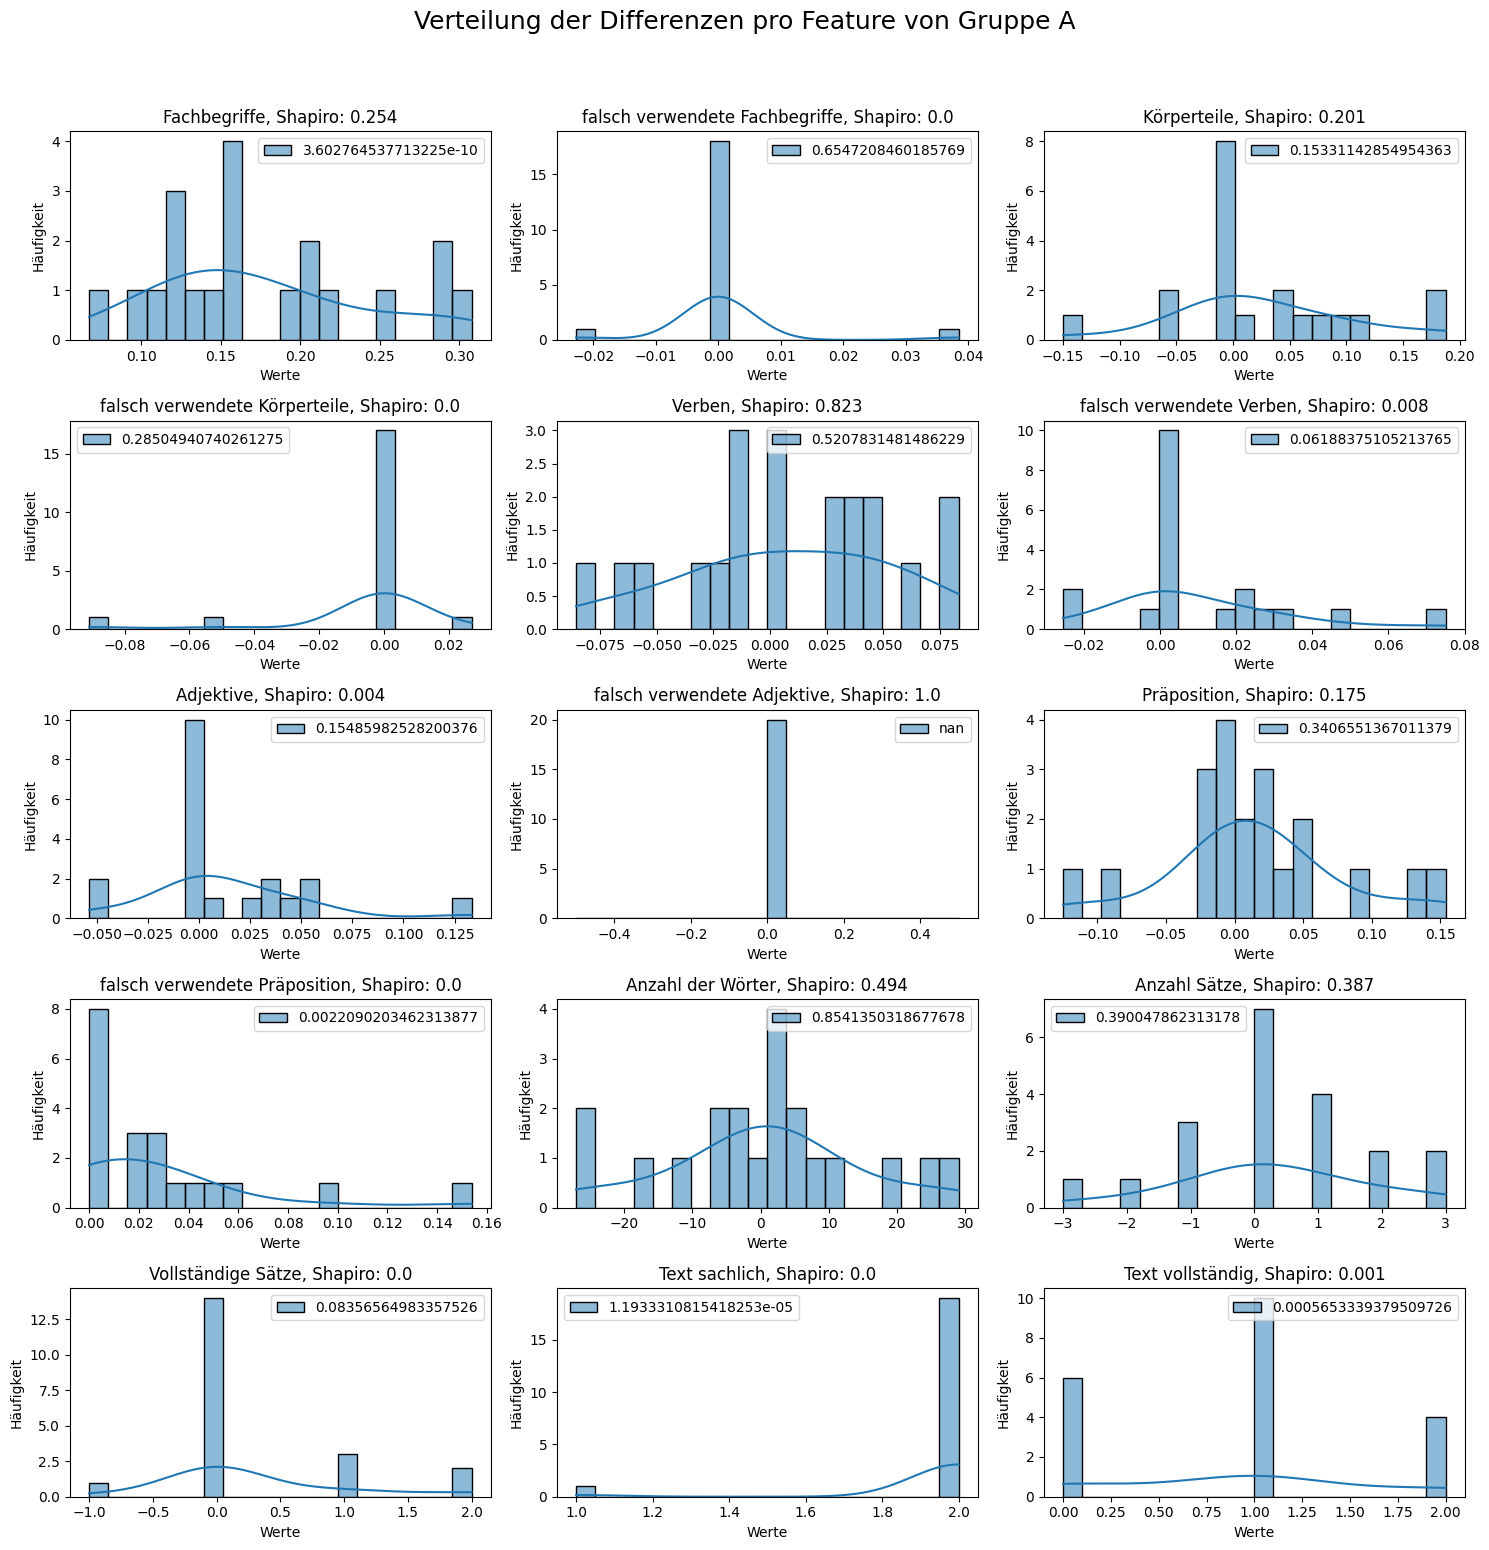

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def evaluation(*args):
    diff, anfang, ende = compare_by_group(*args)


    spalten = diff.columns.tolist()
    fig, axes = plt.subplots(5, 3, figsize=(15, 15)) 
    fig.subplots_adjust(top=0.92)  # add padding above the subtitle
    fig.suptitle(f"Verteilung der Differenzen pro Feature von Gruppe {args[1][-1]}", fontsize=18, y=1.03)
    axes = axes.flatten()
    p_values = {}
    for ax, col in zip(axes, spalten):
        werte = diff[col]  
        stat, p = stats.shapiro(werte)
        if p > 0.05:
            t_stat, p_val = stats.ttest_rel(ende[col].to_list(), anfang[col].to_list())
        else:
            w_stat, p_val = stats.wilcoxon(ende[col].to_list(), anfang[col].to_list())
        p_values[col] = p_val
        sns.histplot(werte, kde=True, bins=20, ax=ax, label=p_val)
        ax.set_title(f"{col}, Shapiro: {round(p, 3)}")
        ax.legend() 
        ax.set_xlabel("Werte")
        ax.set_ylabel("Häufigkeit")

    plt.tight_layout()
    plt.show()
    p_values = pd.DataFrame((p_values.items()), columns=['Feature', 'p-value'])
    return p_values

p_values = evaluation(df_all, "Anfang A", "Ende A")


In [116]:
p_values 

,Feature,p-value
0,Fachbegriffe,3.602765e-10
1,falsch verwendete Fachbegriffe,6.547208e-01
2,Körperteile,1.533114e-01
3,falsch verwendete Körperteile,2.850494e-01
4,Verben,5.207831e-01
5,falsch verwendete Verben,6.188375e-02
6,Adjektive,1.548598e-01
7,falsch verwendete Adjektive,NaN
8,Präposition,3.406551e-01
9,falsch verwendete Präposition,2.209020e-03


In [117]:
from statsmodels.stats.multitest import multipletests

def correction(p_values):
    try:
        p_values = p_values.dropna().copy()
    except AttributeError as e:
        print("NaN already removed:")

    # Bonferroni
    reject_bonf, pvals_bonf, _, _ = multipletests(list(p_values['p-value']), alpha=0.05, method="bonferroni")

    # FDR (Benjamini-Hochberg)
    reject_fdr, pvals_fdr, _, _ = multipletests(list(p_values['p-value']), alpha=0.05, method="fdr_bh")

    p_values['p_bonf'] = pvals_bonf
    p_values['p_fdr'] = pvals_fdr
    p_values['bonf_reject'] = reject_bonf
    p_values['fdr_reject'] = reject_fdr
    return p_values

p_values = correction(p_values)
p_values


,Feature,p-value,p_bonf,p_fdr,bonf_reject,fdr_reject
0,Fachbegriffe,3.602765e-10,5.043870e-09,5.043870e-09,True,True
1,falsch verwendete Fachbegriffe,6.547208e-01,1.000000e+00,7.050840e-01,False,False
2,Körperteile,1.533114e-01,1.000000e+00,2.710047e-01,False,False
3,falsch verwendete Körperteile,2.850494e-01,1.000000e+00,4.434102e-01,False,False
4,Verben,5.207831e-01,1.000000e+00,6.075803e-01,False,False
5,falsch verwendete Verben,6.188375e-02,8.663725e-01,1.732745e-01,False,False
6,Adjektive,1.548598e-01,1.000000e+00,2.710047e-01,False,False
8,Präposition,3.406551e-01,1.000000e+00,4.769172e-01,False,False
9,falsch verwendete Präposition,2.209020e-03,3.092628e-02,7.731571e-03,True,True
10,Anzahl der Wörter,8.541350e-01,1.000000e+00,8.541350e-01,False,False


# Vergleich Anfang B und Ende B aller Schüler

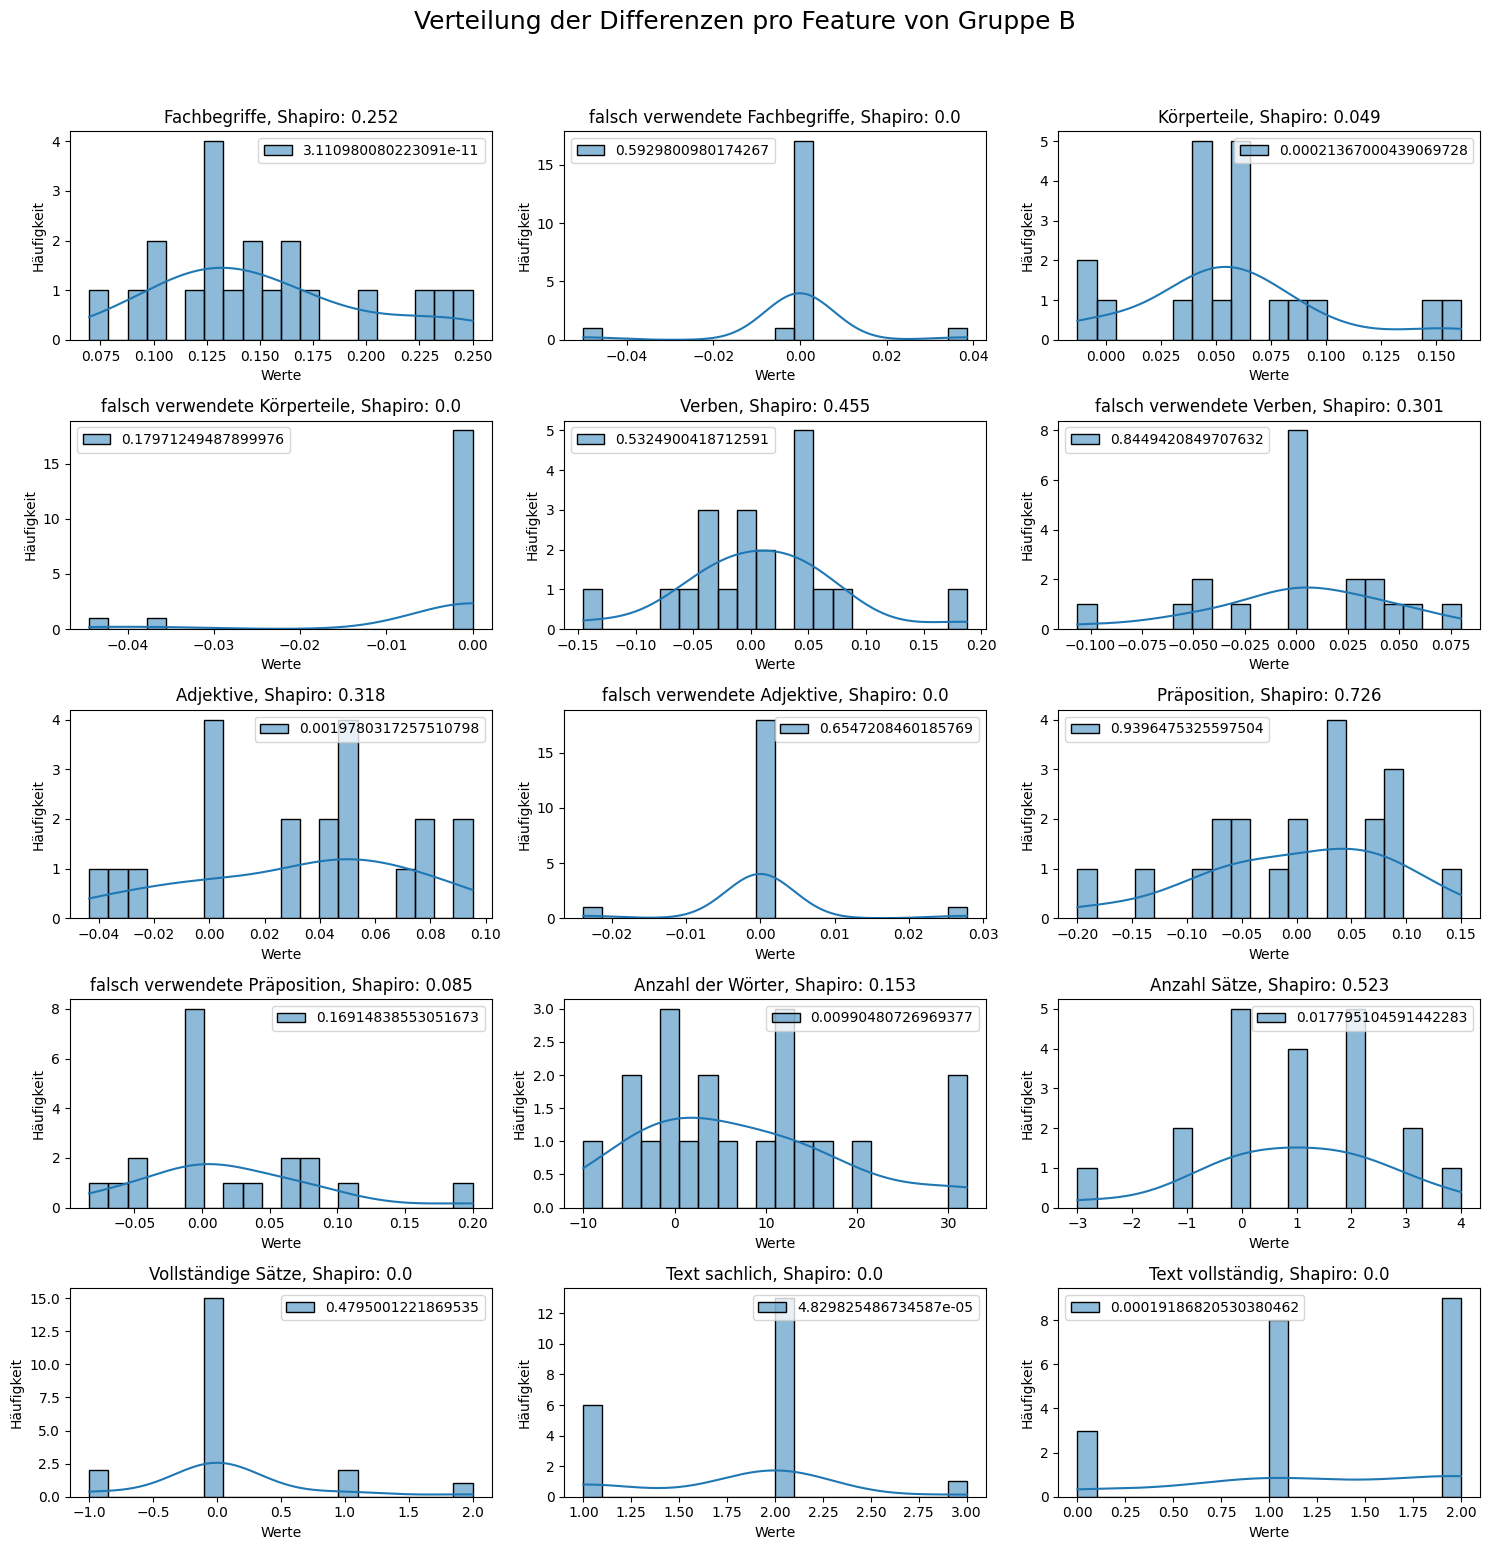

In [118]:
p_values = evaluation(df_all, "Anfang B", "Ende B")

In [119]:
p_values = correction(p_values)
p_values

,Feature,p-value,p_bonf,p_fdr,bonf_reject,fdr_reject
0,Fachbegriffe,3.110980e-11,4.666470e-10,4.666470e-10,True,True
1,falsch verwendete Fachbegriffe,5.929801e-01,1.000000e+00,7.412251e-01,False,False
2,Körperteile,2.136700e-04,3.205050e-03,8.012625e-04,True,True
3,falsch verwendete Körperteile,1.797125e-01,1.000000e+00,2.995208e-01,False,False
4,Verben,5.324900e-01,1.000000e+00,7.261228e-01,False,False
5,falsch verwendete Verben,8.449421e-01,1.000000e+00,9.052951e-01,False,False
6,Adjektive,1.978032e-03,2.967048e-02,5.934095e-03,True,True
7,falsch verwendete Adjektive,6.547208e-01,1.000000e+00,7.554471e-01,False,False
8,Präposition,9.396475e-01,1.000000e+00,9.396475e-01,False,False
9,falsch verwendete Präposition,1.691484e-01,1.000000e+00,2.995208e-01,False,False


/home/dci-student/Auswertung_masterarbeit_marla/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


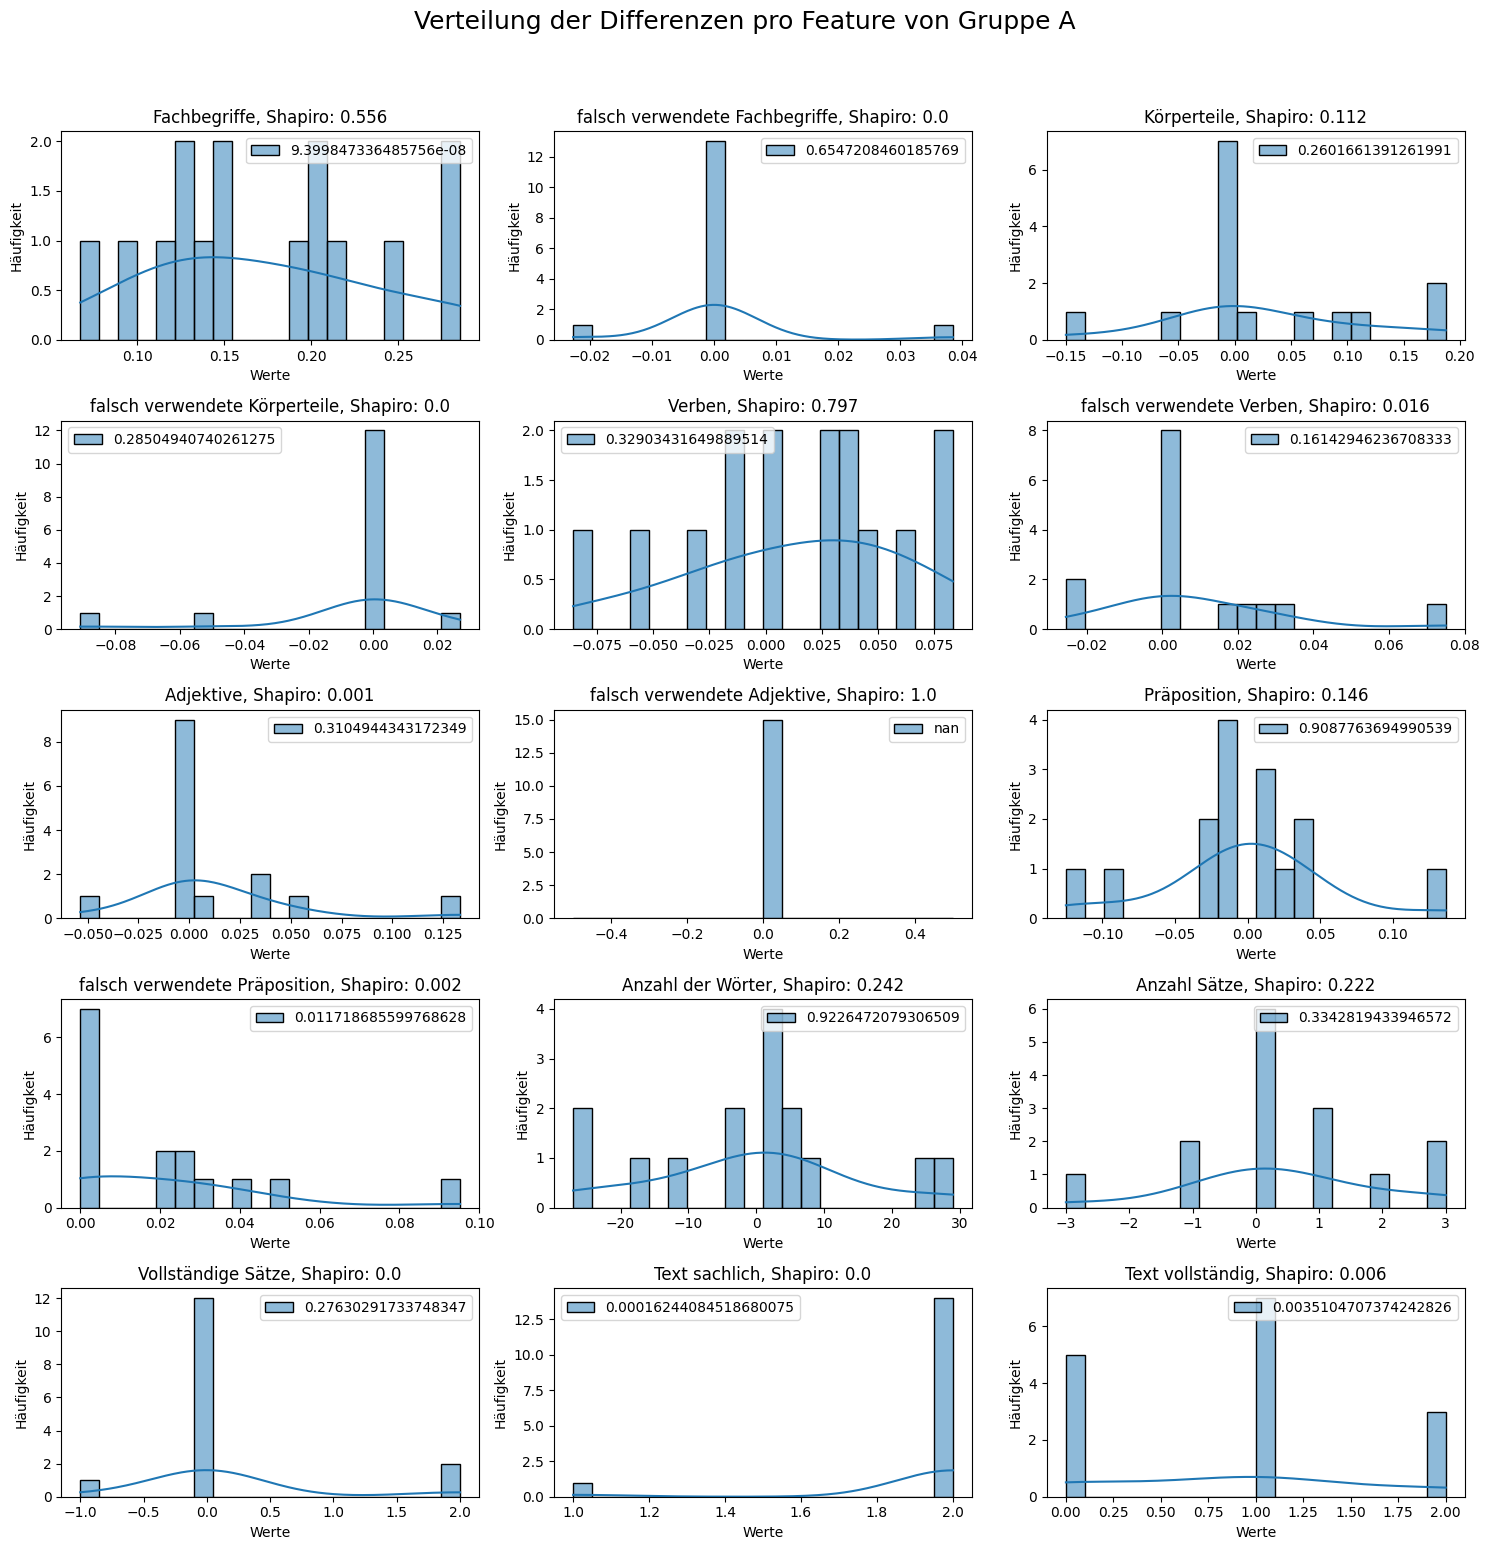

In [120]:
p_values = evaluation(df_spanisch, "Anfang A", "Ende A")

In [121]:
p_values = correction(p_values)
p_values

,Feature,p-value,p_bonf,p_fdr,bonf_reject,fdr_reject
0,Fachbegriffe,9.399847e-08,0.000001,0.000001,True,True
1,falsch verwendete Fachbegriffe,6.547208e-01,1.000000,0.763841,False,False
2,Körperteile,2.601661e-01,1.000000,0.425450,False,False
3,falsch verwendete Körperteile,2.850494e-01,1.000000,0.425450,False,False
4,Verben,3.290343e-01,1.000000,0.425450,False,False
5,falsch verwendete Verben,1.614295e-01,1.000000,0.425450,False,False
6,Adjektive,3.104944e-01,1.000000,0.425450,False,False
8,Präposition,9.087764e-01,1.000000,0.922647,False,False
9,falsch verwendete Präposition,1.171869e-02,0.164062,0.041015,False,True
10,Anzahl der Wörter,9.226472e-01,1.000000,0.922647,False,False


/home/dci-student/Auswertung_masterarbeit_marla/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/home/dci-student/Auswertung_masterarbeit_marla/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/home/dci-student/Auswertung_masterarbeit_marla/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/home/dci-student/Auswertung_masterarbeit_marla/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotes

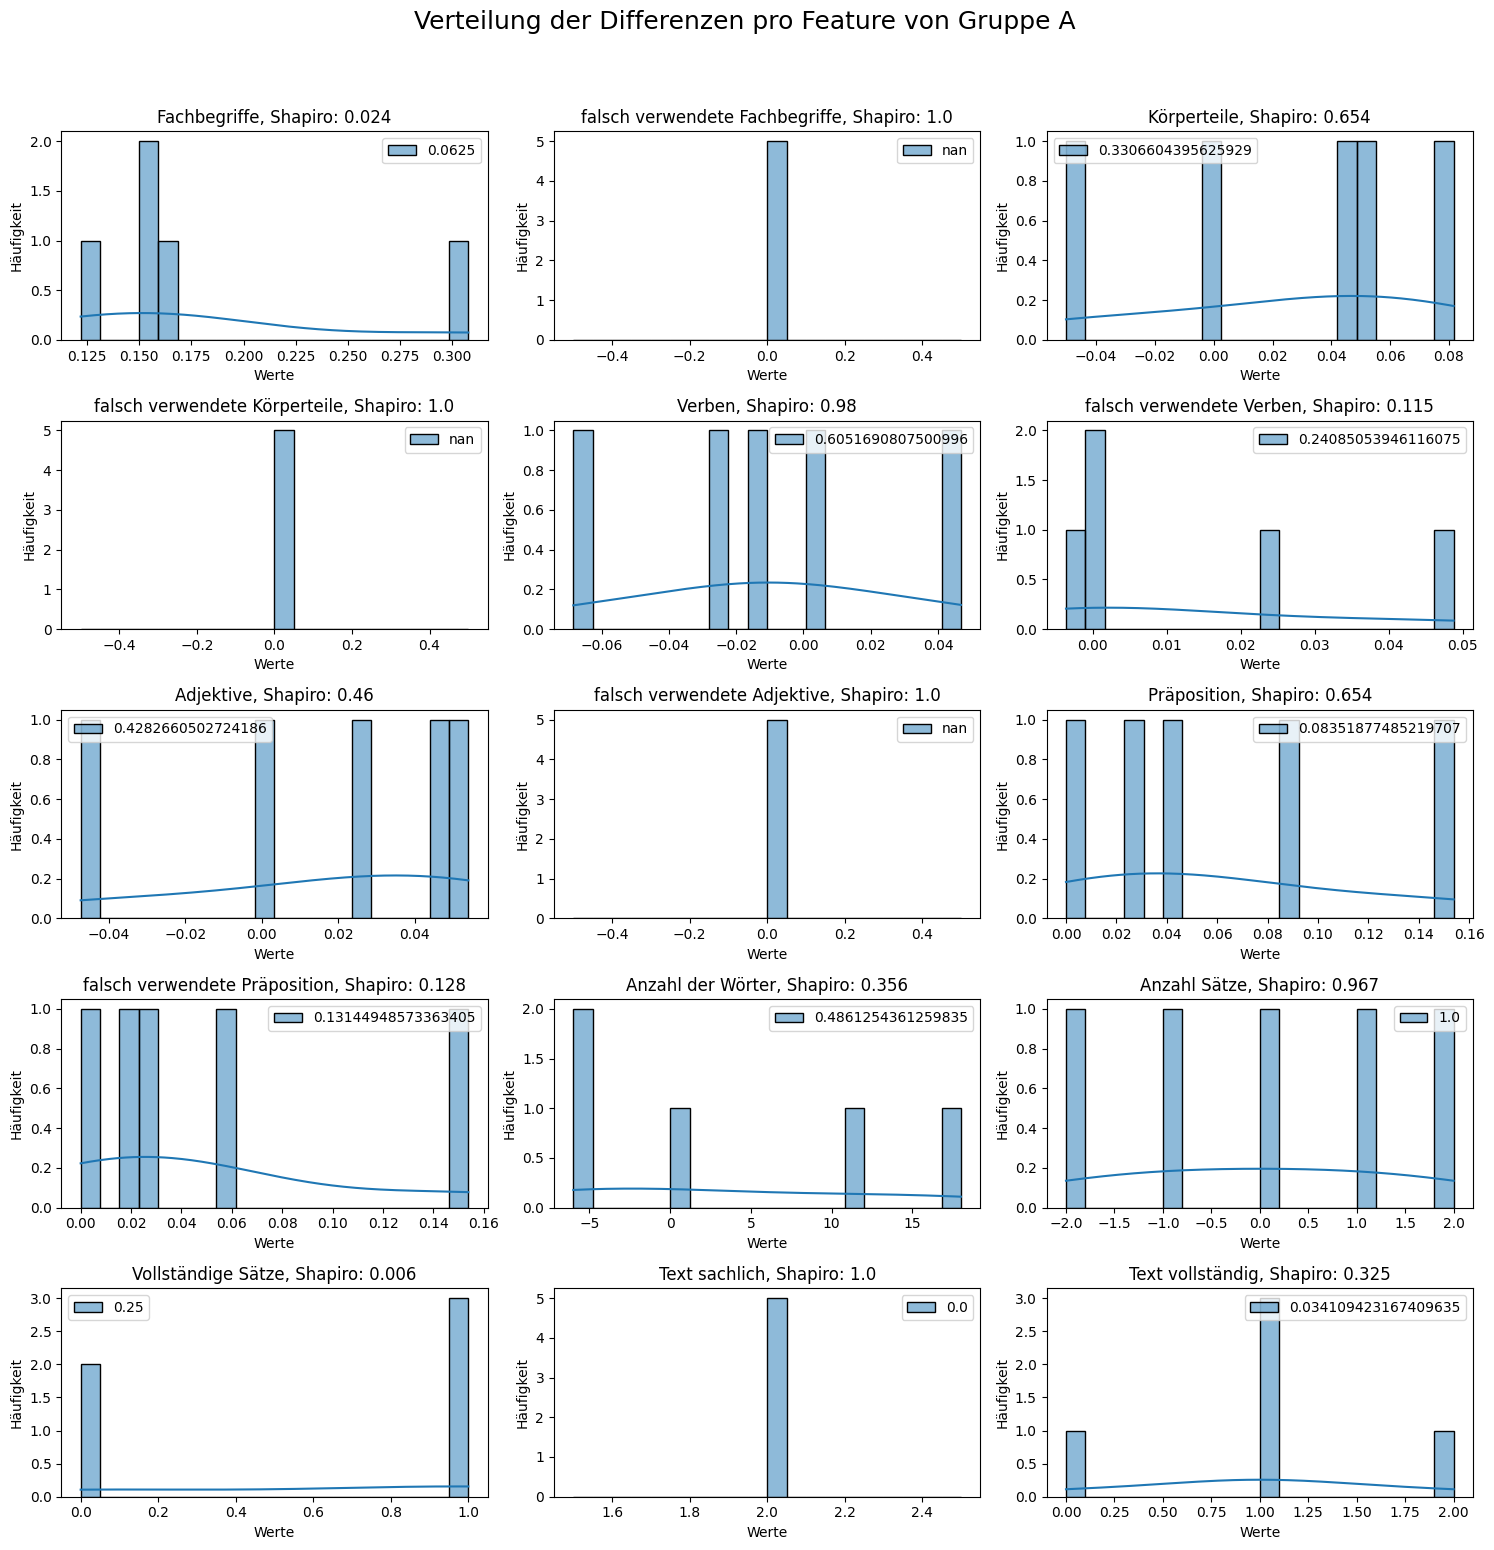

In [122]:
p_values = evaluation(df_deutsch, "Anfang A", "Ende A")

In [123]:
p_values = correction(p_values)
p_values

,Feature,p-value,p_bonf,p_fdr,bonf_reject,fdr_reject
0,Fachbegriffe,0.062500,0.750000,0.250000,False,False
2,Körperteile,0.330660,1.000000,0.495991,False,False
4,Verben,0.605169,1.000000,0.660184,False,False
5,falsch verwendete Verben,0.240851,1.000000,0.428571,False,False
6,Adjektive,0.428266,1.000000,0.571021,False,False
8,Präposition,0.083519,1.000000,0.250556,False,False
9,falsch verwendete Präposition,0.131449,1.000000,0.315479,False,False
10,Anzahl der Wörter,0.486125,1.000000,0.583351,False,False
11,Anzahl Sätze,1.000000,1.000000,1.000000,False,False
12,Vollständige Sätze,0.250000,1.000000,0.428571,False,False


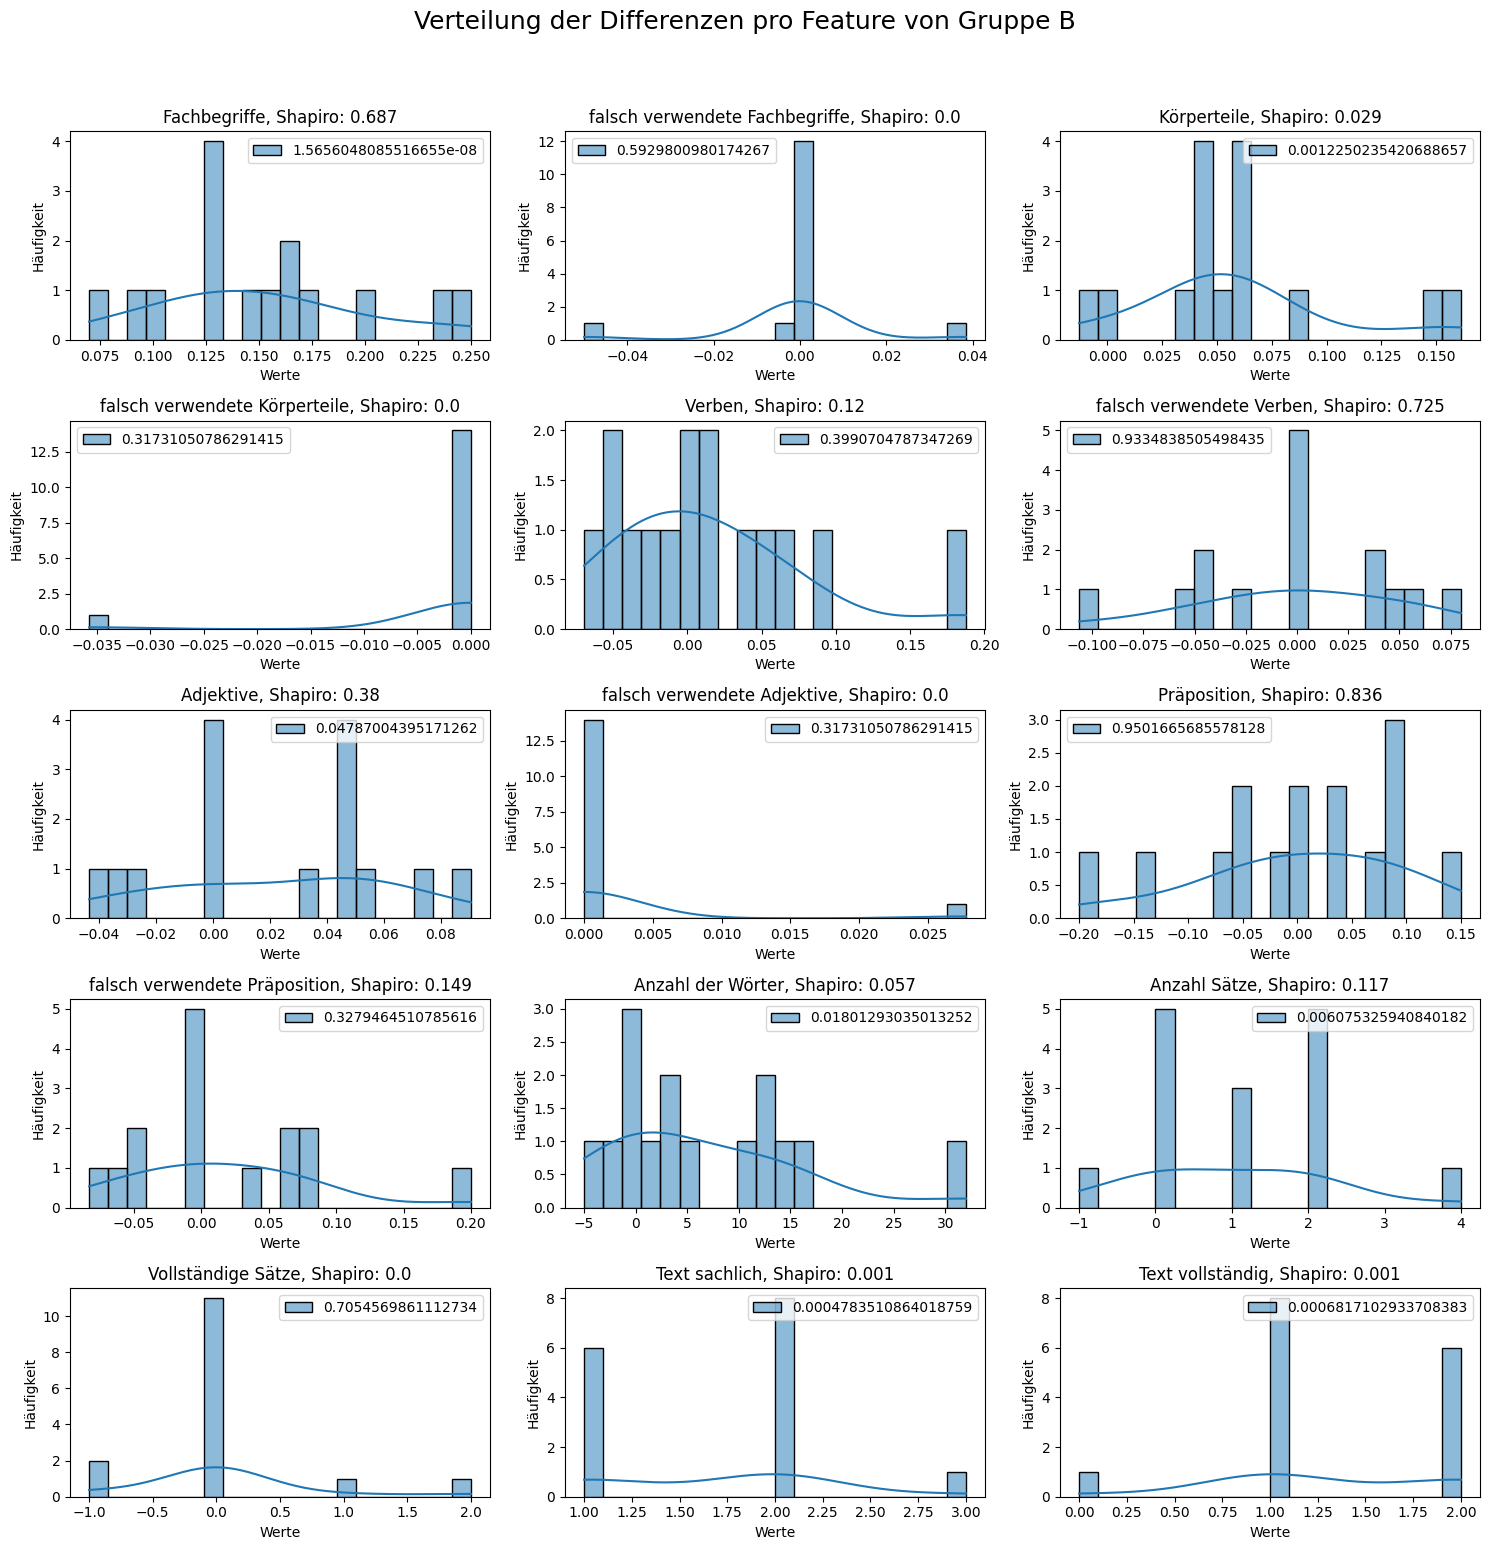

In [124]:
p_values = evaluation(df_spanisch, "Anfang B", "Ende B")

In [125]:
p_values = correction(p_values)
p_values

,Feature,p-value,p_bonf,p_fdr,bonf_reject,fdr_reject
0,Fachbegriffe,1.565605e-08,2.348407e-07,2.348407e-07,True,True
1,falsch verwendete Fachbegriffe,5.929801e-01,1.000000e+00,7.412251e-01,False,False
2,Körperteile,1.225024e-03,1.837535e-02,4.593838e-03,True,True
3,falsch verwendete Körperteile,3.173105e-01,1.000000e+00,4.919197e-01,False,False
4,Verben,3.990705e-01,1.000000e+00,5.441870e-01,False,False
5,falsch verwendete Verben,9.334839e-01,1.000000e+00,9.501666e-01,False,False
6,Adjektive,4.787004e-02,7.180507e-01,1.025787e-01,False,False
7,falsch verwendete Adjektive,3.173105e-01,1.000000e+00,4.919197e-01,False,False
8,Präposition,9.501666e-01,1.000000e+00,9.501666e-01,False,False
9,falsch verwendete Präposition,3.279465e-01,1.000000e+00,4.919197e-01,False,False


/home/dci-student/Auswertung_masterarbeit_marla/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/home/dci-student/Auswertung_masterarbeit_marla/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/home/dci-student/Auswertung_masterarbeit_marla/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:423: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return hypotest_fun_in(*args, **kwds)


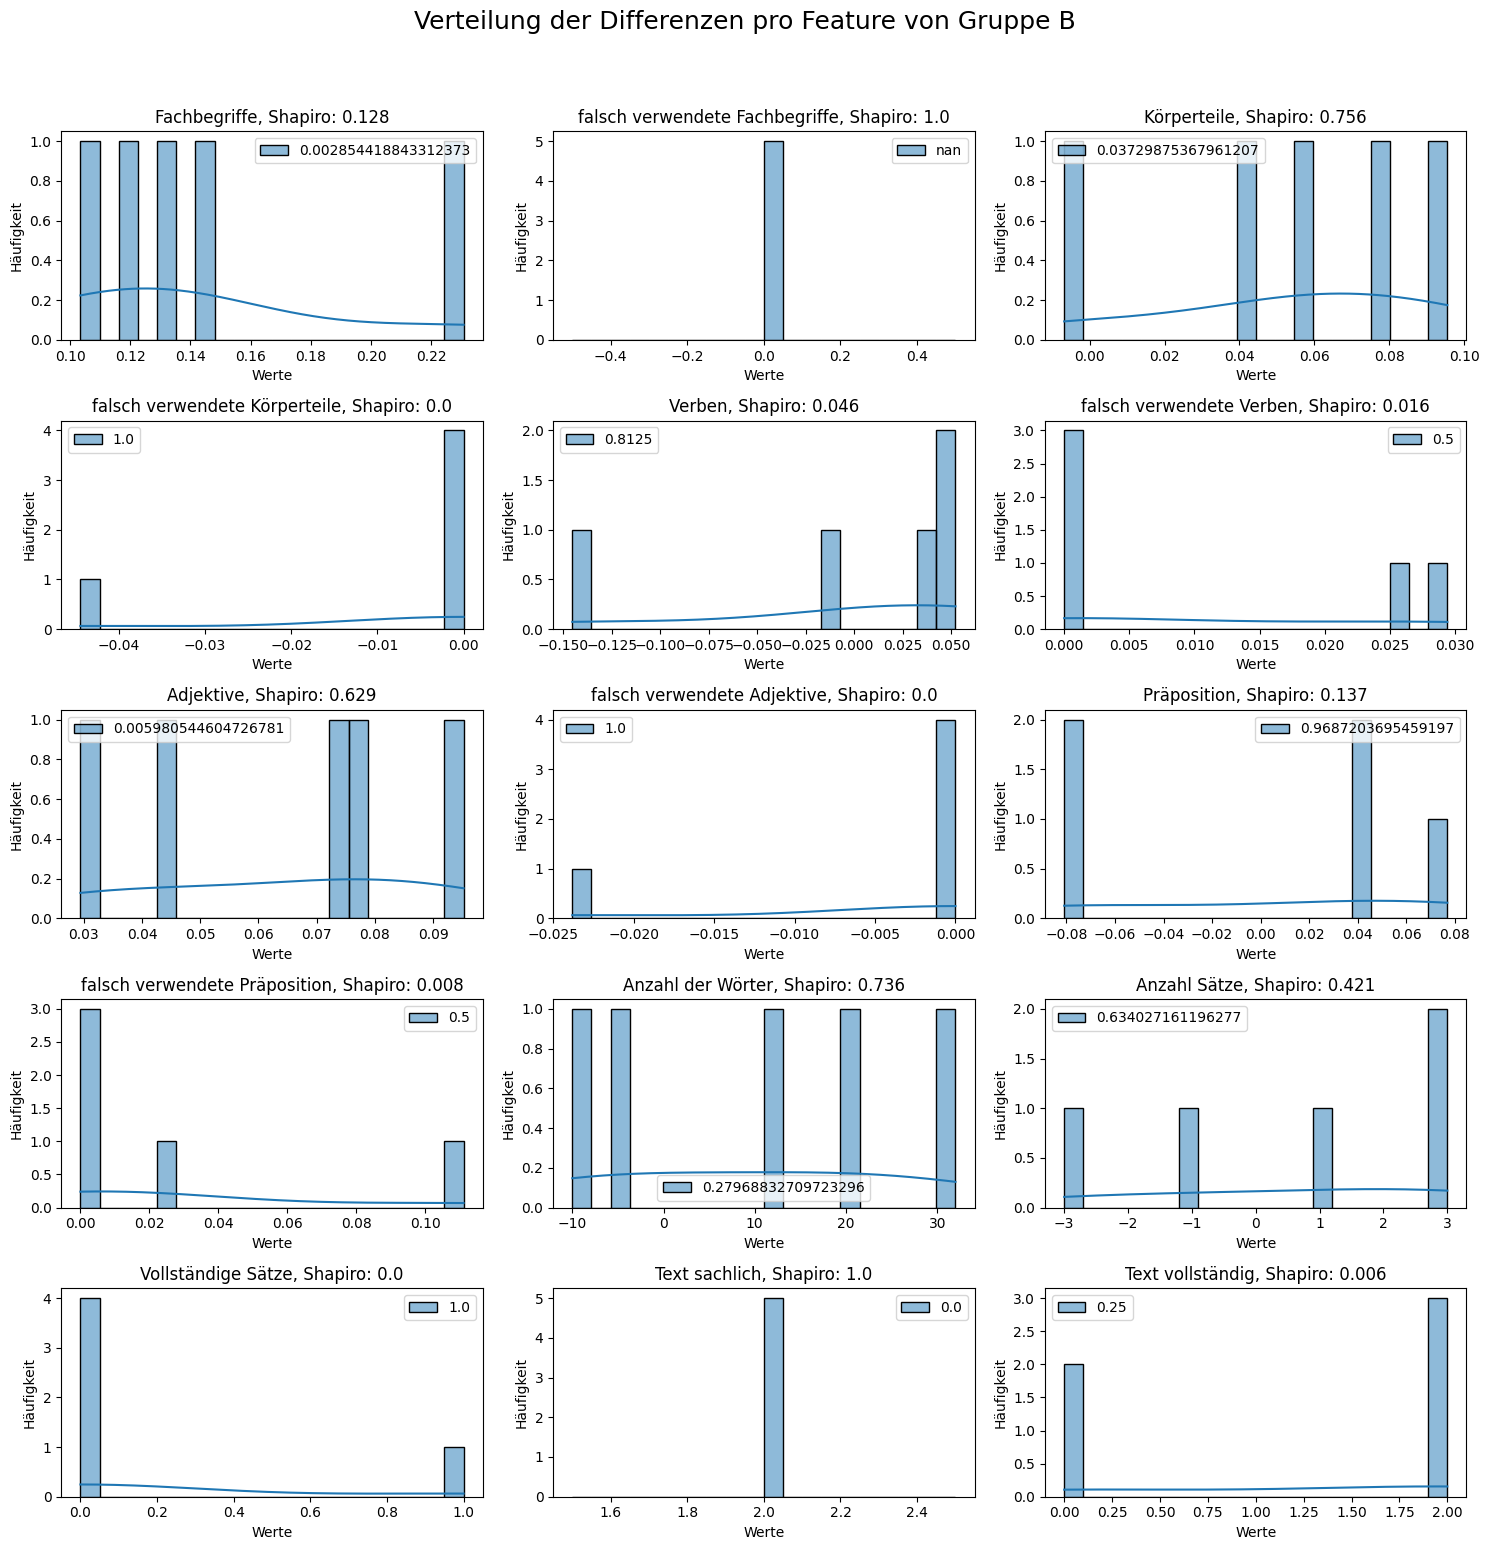

,Feature,p-value,p_bonf,p_fdr,bonf_reject,fdr_reject
0,Fachbegriffe,0.002854,0.039962,0.019981,True,True
2,Körperteile,0.037299,0.522183,0.130546,False,False
3,falsch verwendete Körperteile,1.000000,1.000000,1.000000,False,False
4,Verben,0.812500,1.000000,1.000000,False,False
5,falsch verwendete Verben,0.500000,1.000000,0.875000,False,False
6,Adjektive,0.005981,0.083728,0.027909,False,True
7,falsch verwendete Adjektive,1.000000,1.000000,1.000000,False,False
8,Präposition,0.968720,1.000000,1.000000,False,False
9,falsch verwendete Präposition,0.500000,1.000000,0.875000,False,False
10,Anzahl der Wörter,0.279688,1.000000,0.652606,False,False


In [126]:
p_values = evaluation(df_deutsch, "Anfang B", "Ende B")
p_values = correction(p_values)
p_values